# Exercise 11.11

This example makes use of the data in Table 11.4.

## (a) Create two groups of observations. In Group 1, $X < 2$, whereas in Group 2, $X \geq 2$. Plot the Kaplan-Meier survival curves corresponding to the two groups. Be sure to label the curves so that it is clear which curve corresponds to which group. By eye, does there appear to be a difference between the two groups' survival curves?

Y,delta,X,group
<dbl>,<dbl>,<dbl>,<dbl>
26.5,1,0.1,1
37.2,1,11.0,2
57.3,1,-0.3,1
90.8,0,2.8,2
20.2,0,1.8,1
89.8,0,0.4,1


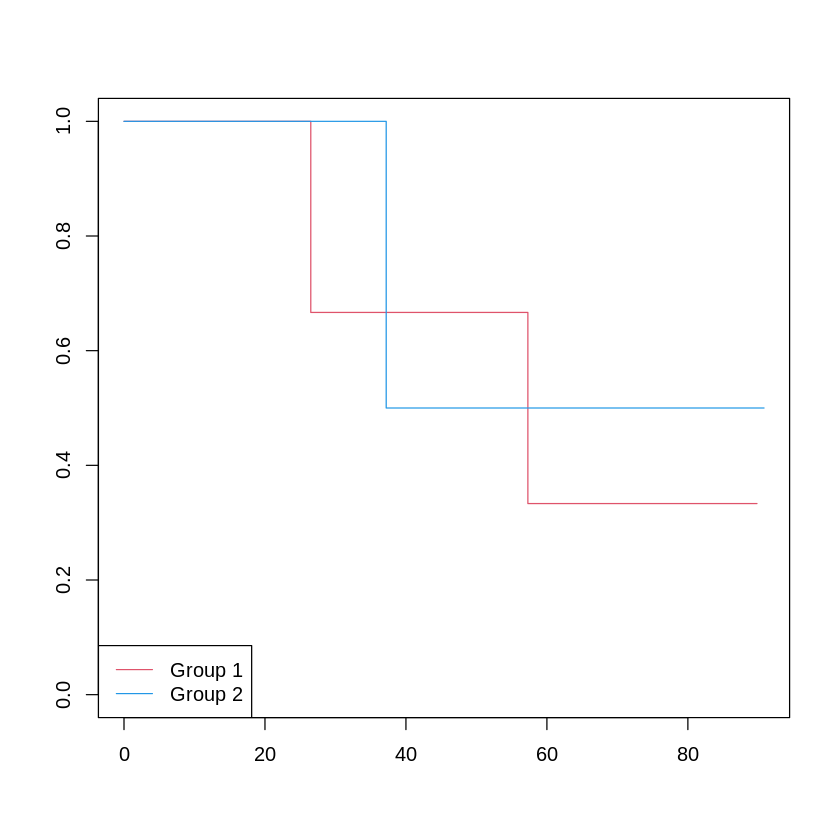

In [ ]:
Y <- c(26.5, 37.2, 57.3, 90.8, 20.2, 89.8)
delta <- c(1, 1, 1, 0, 0, 0)
X <- c(0.1, 11, -0.3, 2.8, 1.8, 0.4)

df <- data.frame(Y, delta, X)
df$group = ifelse(df$X < 2, 1, 2)

df
fit.surv <- survfit(Surv(df$Y, df$delta) ~ df$group)
plot(fit.surv, col=c(2, 4))
legend("bottomleft", legend=c("Group 1", "Group 2"), col=c(2, 4), lty=1)

There seems to be no significant difference between the two groups' survival curves.

## (b) Fit Cox's proportional hazards model, using the group indicator as a covariate. What is the estimated coefficient? Write a sentence providing the interpretation of this coefficient, in terms of the hazard or the instantaneous probability of the event. Is there evidence that the true coefficient value is non-zero?

In [ ]:
fit.cox <- coxph(Surv(df$Y, df$delta) ~ df$group)
summary(fit.cox)

Call:
coxph(formula = Surv(df$Y, df$delta) ~ df$group)

  n= 6, number of events= 3 

            coef exp(coef) se(coef)      z Pr(>|z|)
df$group -0.3401    0.7117   1.2359 -0.275    0.783

         exp(coef) exp(-coef) lower .95 upper .95
df$group    0.7117      1.405   0.06314     8.022

Concordance= 0.556  (se = 0.169 )
Likelihood ratio test= 0.08  on 1 df,   p=0.8
Wald test            = 0.08  on 1 df,   p=0.8
Score (logrank) test = 0.08  on 1 df,   p=0.8


High $p$-values suggest no evidence that the true coefficient value is non-zero.

## (c) Recall from Section 11.5.2 that in the case of a single binary covariate, the log-rank test statistic should be identical to the score statistic for the Cox model. Conduct a log-rank test to determine whether there is a difference between the survival curves for the two groups. How does the $p$-value for the log-rank test statistic compare to the $p$-value for the score statistic for the Cox model from (b)?

In [ ]:
summary(fit.cox)$sctest[1]

logrank.test <- survdiff(Surv(df$Y, df$delta) ~ df$group)
logrank.test
logrank.test$chisq

test 
0.07644306

Call:
survdiff(formula = Surv(df$Y, df$delta) ~ df$group)

           N Observed Expected (O-E)^2/E (O-E)^2/V
df$group=1 4        2     1.77    0.0308    0.0764
df$group=2 2        1     1.23    0.0441    0.0764

 Chisq= 0.1  on 1 degrees of freedom, p= 0.8 

[1] 0.07644306

The statistics and $p$-values of the two tests are the same, respectively. There is no significant difference between the survival curves for the two groups.